<a href="https://colab.research.google.com/github/lemonataste/DataScience/blob/main/ml/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98%EC%99%80_%ED%9A%8C%EA%B7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도 학습
 * 분류와 회귀

지도 학습 알고리즘

In [ ]:
pip install mglearn

한글깨짐방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


예제에 사용할 데이터셋

1. 이진 분류 데이터셋(forge) 확인하기

데이터셋 다운로드

In [ ]:
import mglearn
import matplotlib.pyplot as plt

#데이터셋 만들기
X,y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


데이터 확인하기

In [ ]:
print("X.shape : ", X.shape)
print("y.shape : " ,y.shape)

X.shape :  (26, 2)
y.shape :  (26,)


In [ ]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


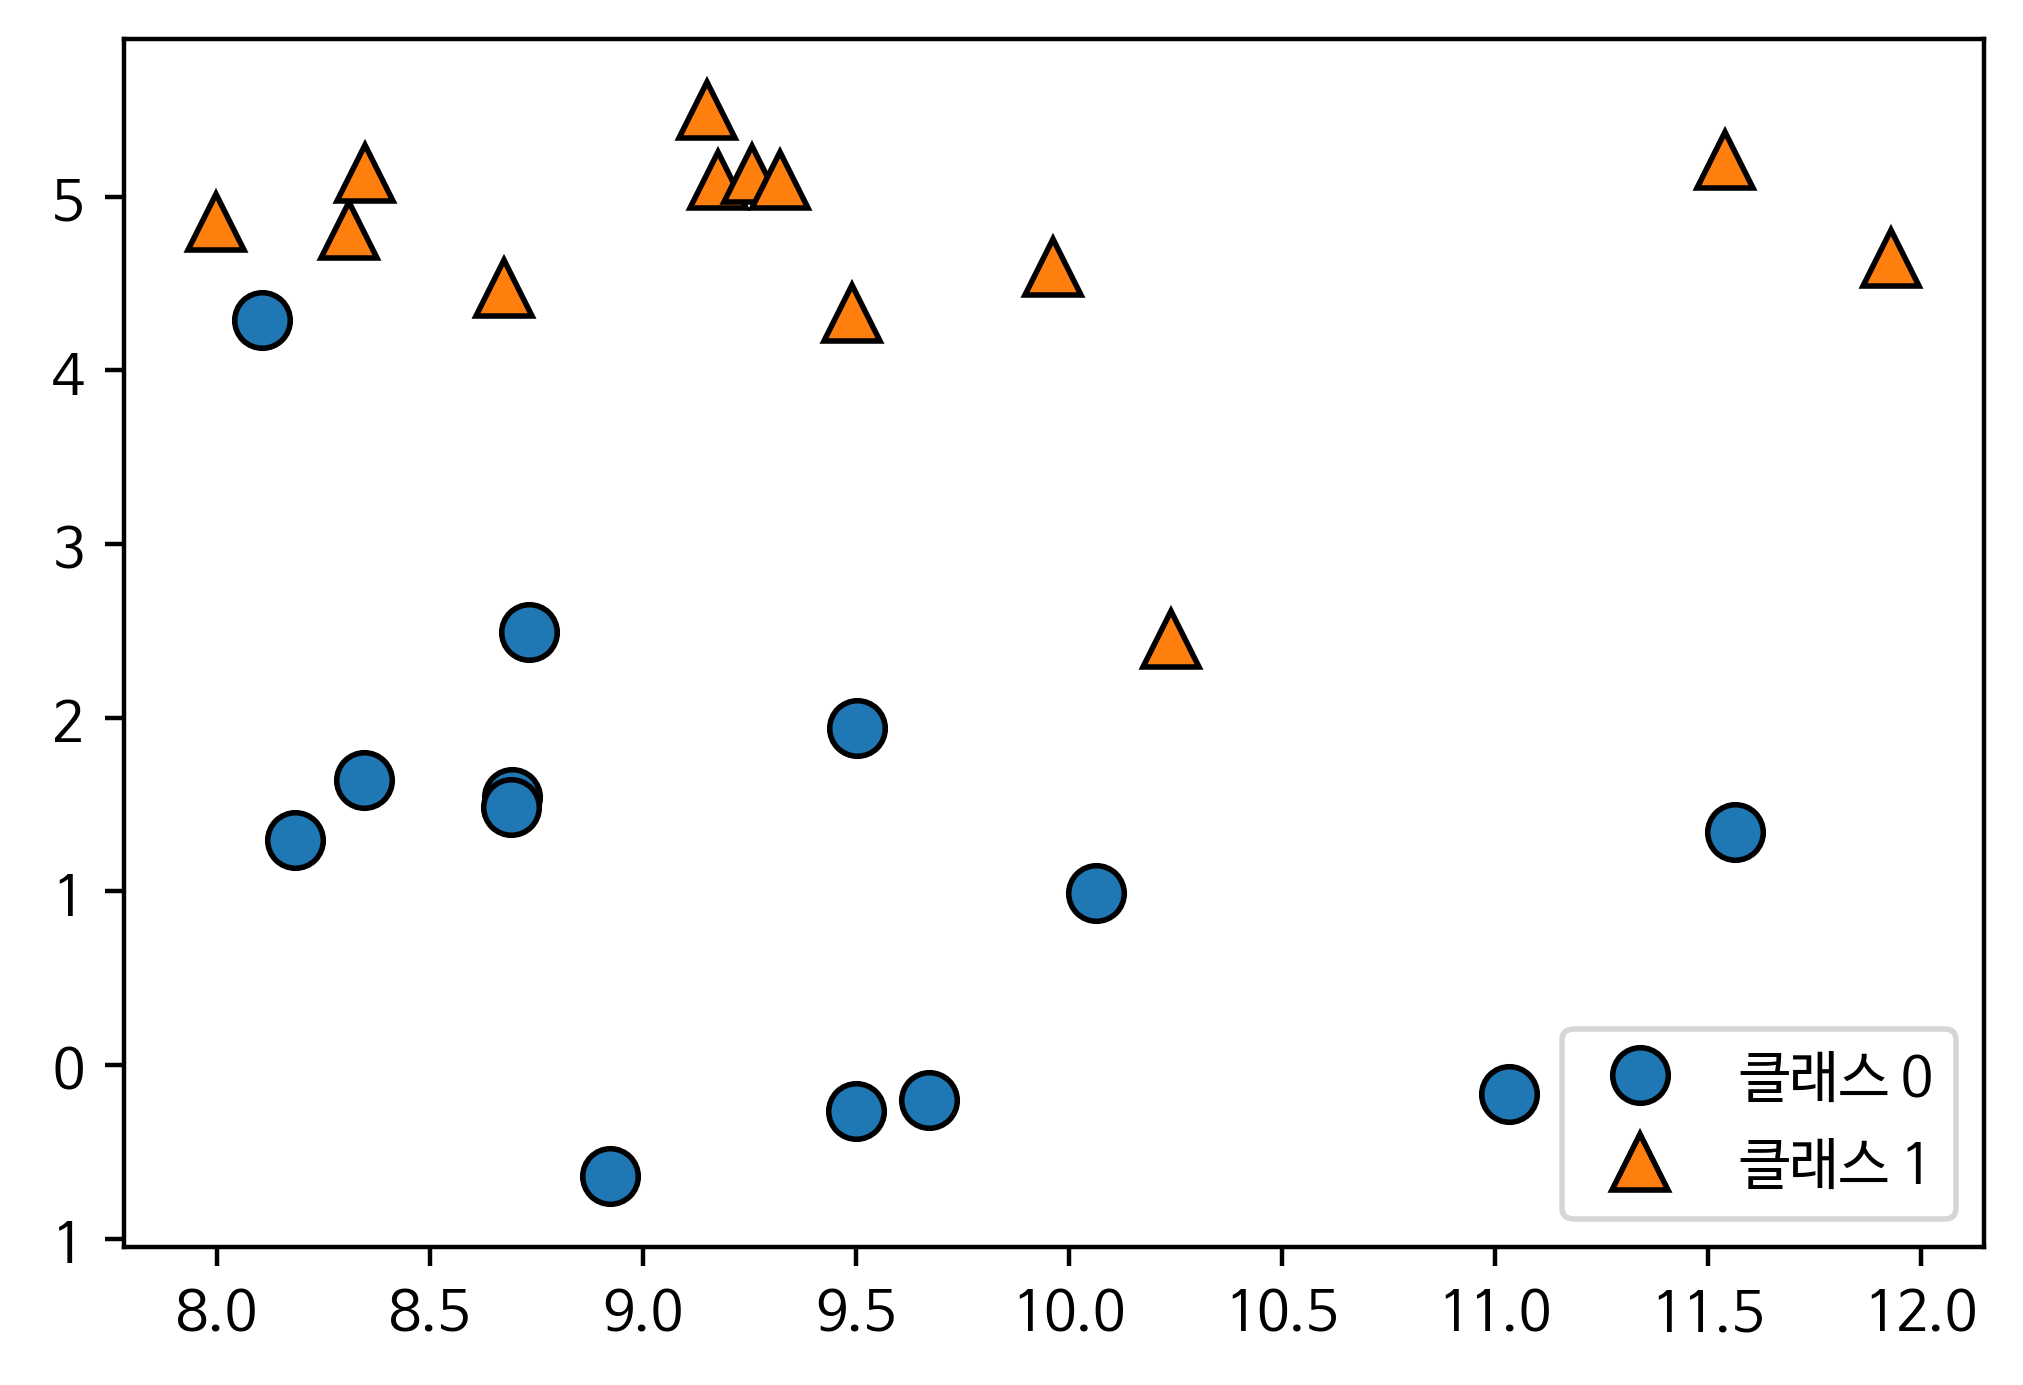

In [ ]:
plt.figure(dpi =200)
plt.rc('font',family = 'NanumBarunGothic')

#산점도 그리기 
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.legend(['클래스 0','클래스 1'],loc=4)
plt.xlabel = ('첫 번째 특성')
plt.ylabel = ('두 번째 특성')
plt.show()

회귀 데이터셋

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40) # 샘플 40개만 사용한다

데이터 확인하기

In [ ]:
print('X.shape : ', X.shape)
print('y.shape : ', y.shape)

X.shape :  (40, 1)
y.shape :  (40,)


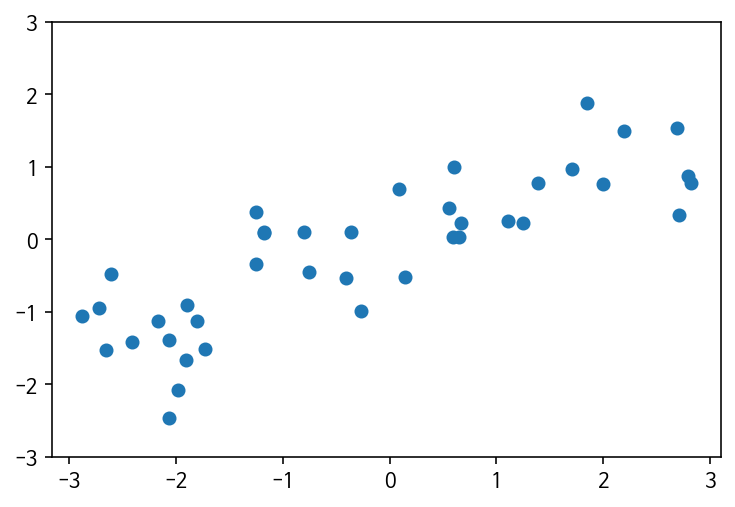

In [ ]:
#산점도 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel = ('특성')
plt.ylabel = ('타깃')
plt.show()

분류 문제정의 : 위스콘신 유방암 데이터셋을 사용한 악성 종양 예측하기

데이터 준비 : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())   #데이터셋 키 확인

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


데이터 확인하기

In [ ]:
cancer.data.shape #유방암 데이터의 형태 -> 569건, 특성 30개

(569, 30)

In [ ]:
#클래스별 샘플 갯수

import numpy as np

#양성, 악성 종양의 비율 37%,63%
{n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [ ]:
#데이터의 특성 확인
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

회귀 문제 정의 : 보스톤 주택 가격 데이터셋을 사용한 보스턴 주변 평균 가격 예측하기

데이터셋 준비하기 : https://www.kaggle.com/c/boston-housing


In [ ]:
from sklearn.datasets import load_boston

boston= load_boston()

데이터 확인하기

In [ ]:
#데이터의 형태 확인
boston.data.shape

(506, 13)

In [ ]:
#데이터 특성 확인
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')